In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
df = pd.read_csv('mushroom.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Preprocessing 
convert into numerical

In [15]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [17]:
df.shape

(8124, 23)

<Axes: xlabel='class', ylabel='Count'>

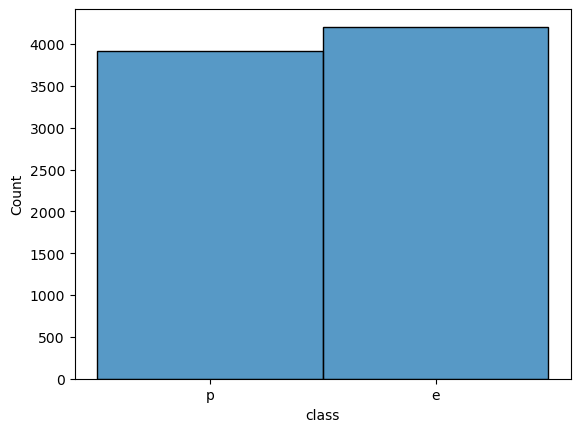

In [21]:
sns.histplot(df['class'])

In [23]:
X = df.drop(['class'],axis=1)
y = df['class']

In [24]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


### Splitting Data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [29]:
# Splitting the data into training and testing data
X_train.shape , X_test.shape

((5443, 117), (2681, 117))

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [31]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5769230769230769, 0.875, 'x[27] <= 0.5\ngini = 0.499\nsamples = 5443\nvalue = [2830, 2613]'),
 Text(0.3076923076923077, 0.625, 'x[53] <= 0.5\ngini = 0.281\nsamples = 3053\nvalue = [517, 2536]'),
 Text(0.15384615384615385, 0.375, 'x[55] <= 0.5\ngini = 0.125\nsamples = 2691\nvalue = [181, 2510]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.046\nsamples = 2570\nvalue = [60, 2510]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 121\nvalue = [121, 0]'),
 Text(0.46153846153846156, 0.375, 'x[94] <= 0.5\ngini = 0.133\nsamples = 362\nvalue = [336, 26]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 336\nvalue = [336, 0]'),
 Text(0.8461538461538461, 0.625, 'x[100] <= 0.5\ngini = 0.062\nsamples = 2390\nvalue = [2313, 77]'),
 Text(0.7692307692307693, 0.375, 'x[63] <= 0.5\ngini = 0.025\nsamples = 2343\nvalue = [2313, 30]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.004\nsamples = 2307\nv

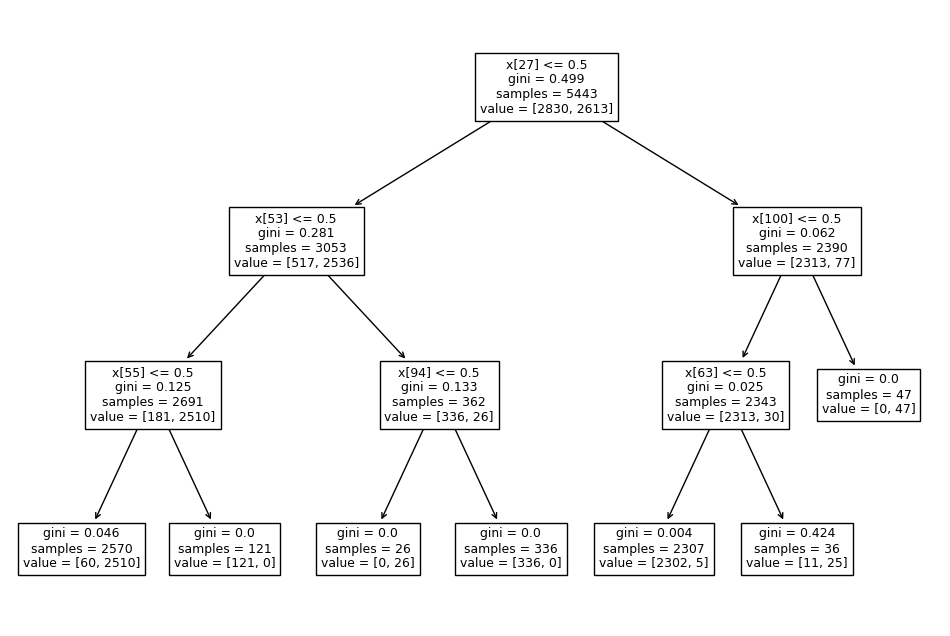

In [32]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# Accuracy

In [33]:
y_pred_gini = clf_gini.predict(X_test)

In [34]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 1, 0, ..., 0, 1, 0])

In [35]:
# printing the accuracy of the model
ans = accuracy_score(y_test, y_pred_gini)
print('Model accuracy score with criterion gini index :',ans * 100)

ans1 = accuracy_score(y_train, y_pred_train_gini)
print('Training-set accuracy score :',ans1 * 100)

Model accuracy score with criterion gini index : 98.35882133532265
Training-set accuracy score : 98.60371118868271
